#Answer to - How do I combine and display active and reactive power data on the same graph?#

##Starting assumptions##
  1. The nilmtk is installed and working, along with all of its dependencies
  2. IPython notebook is installed and working and you know how to use it
  3. You have a dataset available that contains the data you want to display
  4. You have imported the data into the toolkit by creating a HDF5 file containg the data and metadata

##The steps to follow are listed below##

##Step-1 Imports and graph setup##

In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')
from nilmtk import DataSet

##Step-2 Import the data and extract the part you are interested in

In [2]:
gjw = DataSet('/Users/GJWood/nilm_gjw_data/HDF5/nilm_gjw_data.hdf5') #load the data from HDF5 file
gjw.set_window(start='2013-11-13 00:00:00', end='2013-11-14 00:00:00') #select a portion of the data
elec = gjw.buildings[1].elec #Select the relevant meter group

house = elec['fridge'] #only one meter so any selection will do


In [3]:
df = house.load().next() #load the first chunk of data into a dataframe
df.info() #check that the data is what we want (optional)
#note the data has two columns and a time index
#The period is one day, containing 86400 entries, one per second

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86400 entries, 2013-11-13 00:00:00+00:00 to 2013-11-13 23:59:59+00:00
Data columns (total 2 columns):
(power, reactive)    86400 non-null float32
(power, active)      86400 non-null float32
dtypes: float32(2)
memory usage: 1.3 MB


##Step-3 Plot the data from the dataframe##

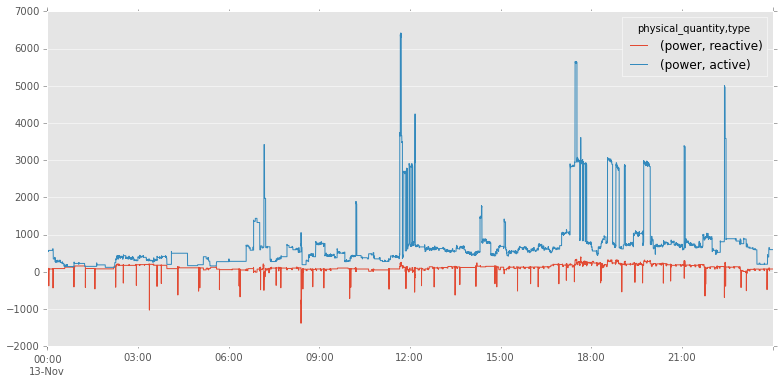

In [4]:
df.plot()

##Step-4 Zoom in on a time period of interest (optional)##

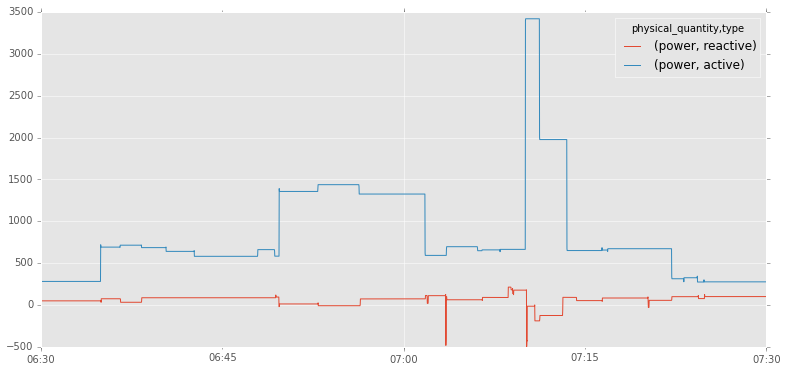

In [5]:
df.ix['2013-11-13 06:30:00':'2013-11-13 07:30:00'].plot()# select a time range and plot it

##Step-5 See what is attached to this meter (optional)##

In [6]:
house

ElecMeter(instance=1, building=1, dataset='gjwdata', site_meter, appliances=[Appliance(type='washing machine', instance=1), Appliance(type='tumble dryer', instance=1), Appliance(type='freezer', instance=1), Appliance(type='boiler', instance=1), Appliance(type='light', instance=1), Appliance(type='light', instance=2), Appliance(type='clothes iron', instance=1), Appliance(type='food steamer', instance=1), Appliance(type='kettle', instance=1), Appliance(type='toaster', instance=1), Appliance(type='coffee maker', instance=1), Appliance(type='microwave', instance=1), Appliance(type='electric oven', instance=1), Appliance(type='fridge', instance=1), Appliance(type='dish washer', instance=1), Appliance(type='waste disposal unit', instance=1), Appliance(type='water filter', instance=1), Appliance(type='fan', instance=1), Appliance(type='light', instance=3), Appliance(type='mobile phone charger', instance=1), Appliance(type='television', instance=1), Appliance(type='server computer', instance=1